In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Group Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,12/1/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,6/15/2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2/8/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,5/3/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,8/2/2021,Paracetamol,Normal


In [4]:
cross_tab = pd.crosstab(index=[data['Medical Condition'], data['Blood Group Type']], columns=data['Gender'])
cross_tab.head(15)

Gender                              Female  Male
Medical Condition Blood Group Type              
Arthritis         A+                    94   108
                  A-                   103    99
                  AB+                  105   114
                  AB-                  108    96
                  B+                   105    91
                  B-                    88    98
                  O+                   111   114
                  O-                   101   115
Asthma            A+                   117   103
                  A-                   109    99
                  AB+                  102    97
                  AB-                  117    93
                  B+                   108   109
                  B-                   107   111
                  O+                   117   110

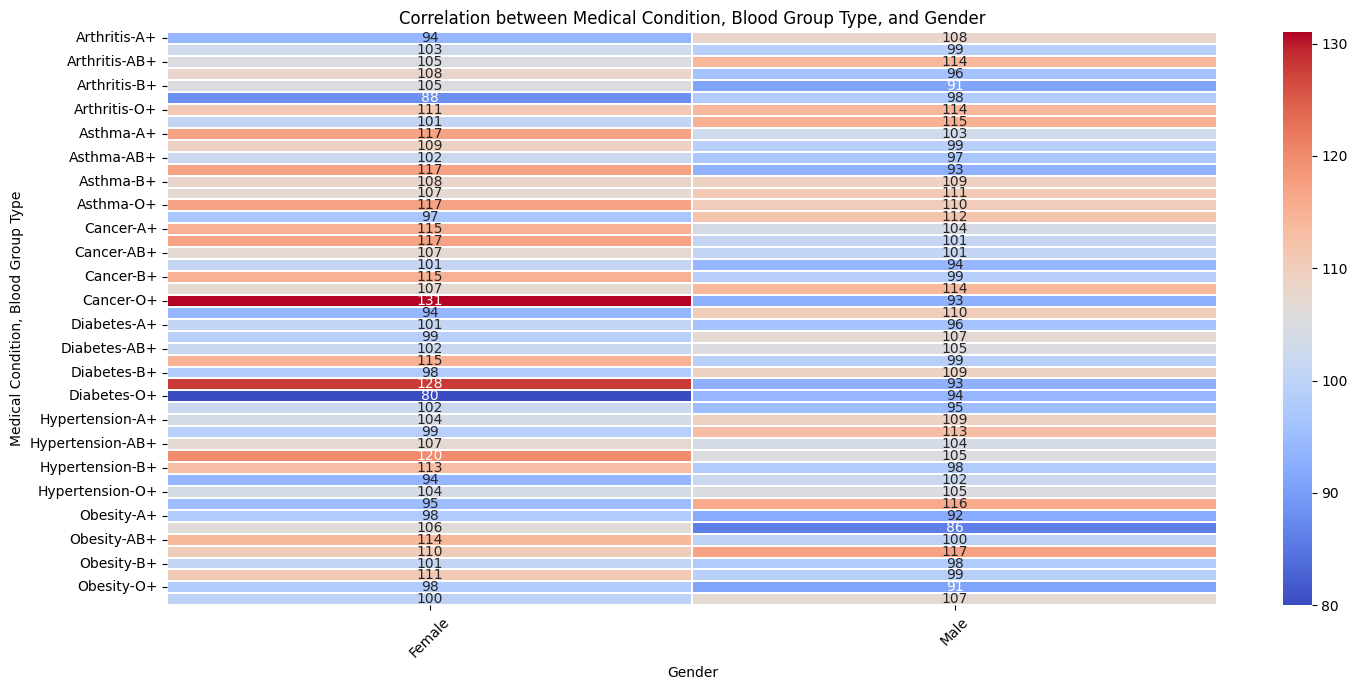

In [22]:
#1a) Create a plot to find out if there is any co-relation between the Blood Group Type, Gender and the Medical Condition?

#Soln:
plt.figure(figsize=(15, 7))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm', linewidth= 0.1)
plt.title('Correlation between Medical Condition, Blood Group Type, and Gender')
plt.xlabel('Gender')
plt.ylabel('Medical Condition, Blood Group Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#1b) b.	Find out the Average Billing Amount required to treat each medical Condition?

#Soln
avg_billing_amount = data.groupby('Medical Condition')['Billing Amount'].mean().reset_index()
print(avg_billing_amount)

  Medical Condition  Billing Amount
0         Arthritis    25187.631255
1            Asthma    25416.869895
2            Cancer    25539.096133
3          Diabetes    26060.116129
4      Hypertension    25198.033973
5           Obesity    25720.842683


In [24]:
#2a)Create a Web Application (Web Form) where Users can enter their Name, Gender and Blood Group and it should show them the Medical Condition they are at most risk.


df = pd.DataFrame(data)

#Grouped by gender and blood group type, them coount the occurances of each medical condition
grouped = df.groupby(['Gender','Blood Group Type', 'Medical Condition']).size().reset_index(name = "Count")
grouped

,Gender,Blood Group Type,Medical Condition,Count
0,Female,A+,Arthritis,94
1,Female,A+,Asthma,117
2,Female,A+,Cancer,115
3,Female,A+,Diabetes,101
4,Female,A+,Hypertension,104
...,...,...,...,...
91,Male,O-,Asthma,112
92,Male,O-,Cancer,110
93,Male,O-,Diabetes,95
94,Male,O-,Hypertension,116


In [13]:
# Get the index of the maximum count for each combination of gender and blood group type
idx = grouped.groupby(['Gender','Blood Group Type'])['Count'].idxmax()
idx

Gender  Blood Group Type
Female  A+                   1
        A-                   8
        AB+                 17
        AB-                 22
        B+                  26
        B-                  33
        O+                  38
        O-                  45
Male    A+                  52
        A-                  58
        AB+                 60
        AB-                 71
        B+                  73
        B-                  80
        O+                  84
        O-                  94
Name: Count, dtype: int64

In [15]:
# Filter the grouped DataFrame to get the rows with the maximum count for each combination
result_df = grouped.loc[idx]
result_df

,Gender,Blood Group Type,Medical Condition,Count
1,Female,A+,Asthma,117
8,Female,A-,Cancer,117
17,Female,AB+,Obesity,114
22,Female,AB-,Hypertension,120
26,Female,B+,Cancer,115
33,Female,B-,Diabetes,128
38,Female,O+,Cancer,131
45,Female,O-,Diabetes,102
52,Male,A+,Hypertension,109
58,Male,A-,Hypertension,113


In [25]:
result_df.to_csv('medical_condition_risk.csv', index=False)
